<a href="https://colab.research.google.com/github/nsaali/ASU-Graduate-Courses/blob/main/Saali_Module2_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Comparison of Linear and Cubic Spline Interpolation')

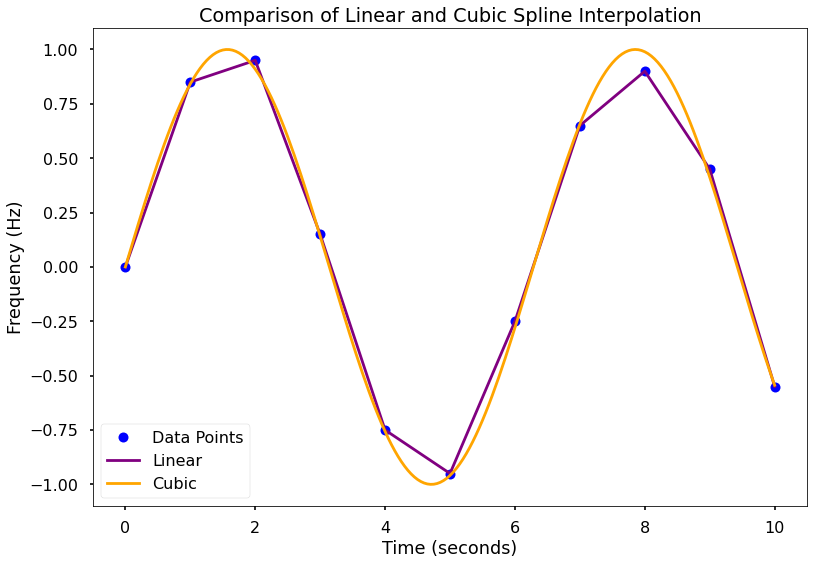

In [56]:
# Nick Saali_Module B_Interpolation 

# Interpolation is a numerical method to find some value of y for a value of x 
# not in the list of given points

  # Two of the common methods of interpolation for a few number of points are:

    # Linear Spline Interpolation and Cubic Spline Interpolation 

      # Linear Interpolation finds values within a set of given points by
      # finding piecewise linear polynomial functions for the straight line 
      # between two adjacent points.
      # So, the resulting graph of the functions that pass
      # through all of the given points appears 'jagged'.

      # Cubic Spline Interpolation finds the piecewise cubic polynomial functions
      # where the first and second derivatives at a given point are continuous.
      # The resulting graph is smoothed out. The examples below show this example.

    # So, Cubic Spline Interpolation aims not approximate the line, rather, it 
    # aims to fit the line such that it passes through all of the data points. 
    # So, when we interpolate, we should get a relatively accurate value, 
    # not an approximation as in, for example, linear regression

# Some Mathematics behind Cubic Spline Interpolation 
# Sources: Youtube, geeksforgeeks.com (Jeffrey Chasnov and Data Science for Biologists)

# We have a set of points (x0,y0),(x1,y1),...,(xn,yn) with n+1 constraints
# We want to find some value of y at some value of x not in the list...

    # gi(x) = ai(x-xi)^3 + bi(x-xi)^2 + ci(x-xi) + di 
    # So, above we have 4n unknowns, n being the number of cubic spline polynomials

# 2n Constraints :   

    #gi(xi) = yi   and   gi(xi+1) = yi+1

# 2(n-1) Constraints on first and second derivatives (gi' and gi'') :

    # g'i(xi+1) = gi+1'(xi+1)
    # g''i(xi+1) = gi+1''(xi+1)

# Now we have 4n Unknowns and 4n-2 Constraints 
# We can define known points as :

    # Hi = xi+1 - xi    and    Ei = yi+1 - yi

# Take the above fill in to show that Constraints determine :

    #1     di = yi
    #2     aiHi^3 + biHi^2 + ciHi = Ei 
    #3     3aiHi^2 + 2biHi + ci = ci+1
    #4     6aiHi + 2bi = 2bi+1
# Need 2 more Constraints so we can solve for a,b,c,d coefficients
# Solve #3 for ai in terms of bi 
# Solve #2 for ci in terms of bi
# #4 becomes :      
     
     #      1/3Hibi + 2/3(Hi + Hi+1) + 1/3(Hi+1 + bi+2) = 
     
     #         (Ei+1 / Hi+1   -   Ei / Hi)

# Not - A - Knot Condition

# 3 equvialent conditions 
      # g0(x) = g1(x)
      # g0(x1)''' = g1(x1)'''
      # a0 = a1

# 2 equivalent conditions for Right-Hand Side of Interpolation
      # gn-2(x) = gn(x)
      # an-2 = an-1


# EXAMPLE Pieces from youtube, stackoverflow, umass.edu

import matplotlib.pyplot as pl 
import numpy as np
from scipy.interpolate import interp1d

# Given Points and Desired Unknown Values 
Time = [0,1,2,3,4,5,6,7,8,9,10] 
Frequency = [0,0.85,0.95,0.15,-0.75,-0.95,-0.25,0.65,0.90,0.45,-0.55]

Time_New = np.linspace(0.,10.,201)

# Here are our linear and cubic interpolating functions
linear_fxn = interp1d(Time, Frequency,'linear')
cubic_fxn = interp1d(Time,Frequency,'cubic')

y_linear = linear_fxn(Time_New)
y_cubic = cubic_fxn(Time_New)

ax.set_xlim([-1, 10])
ax.set_ylim([-1, 1])

pl.plot(Time,Frequency, 'bo' ,markersize=10)
pl.plot(Time_New,y_linear, color = 'purple')
pl.plot(Time_New,np.sin(Time_New),color = 'orange')
pl.legend(['Data Points','Linear','Cubic'],loc='best')
pl.xlabel('Time (seconds)')
pl.ylabel('Frequency (Hz)')
pl.title('Comparison of Linear and Cubic Spline Interpolation')


